In [1]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Методами Pandas:

<Axes: >

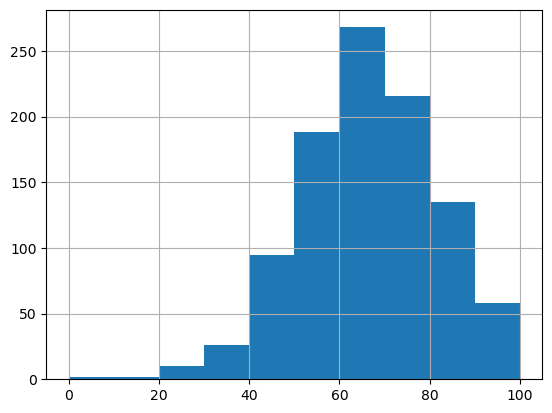

In [7]:
students_performance['math score'].hist()

<Axes: xlabel='math score', ylabel='reading score'>

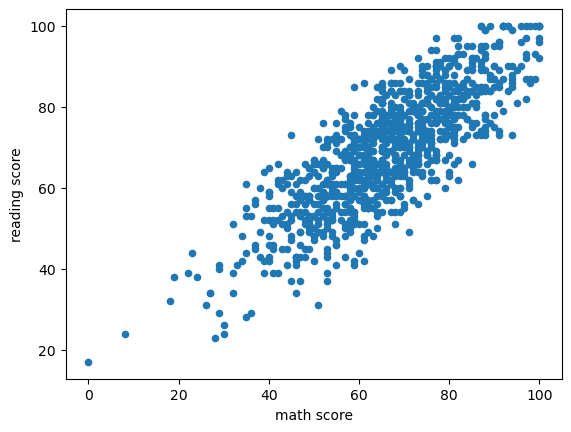

In [8]:
students_performance.plot.scatter(x='math score', y='reading score')

##### sns.lmplot

Если хотим график сильно кастомизировать, то лучше использовать библиотеку Сиборн (надстройка над Матплотлибом)

hue = группирующая переменная

fit_reg=False = убирает регрессионные прямые

Сохранили график в переменную ax. Далее к графику можно применить свои методы.

.set_xlabels = поменять названия осей

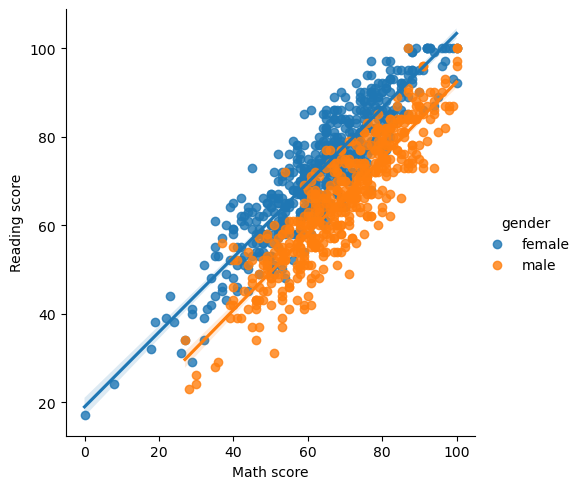

In [18]:
ax = sns.lmplot(x='math score', y='reading score', hue='gender', data=students_performance)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [20]:
salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
salary.head(2)

,income
2018-11-30,20
2018-12-31,60


<Axes: >

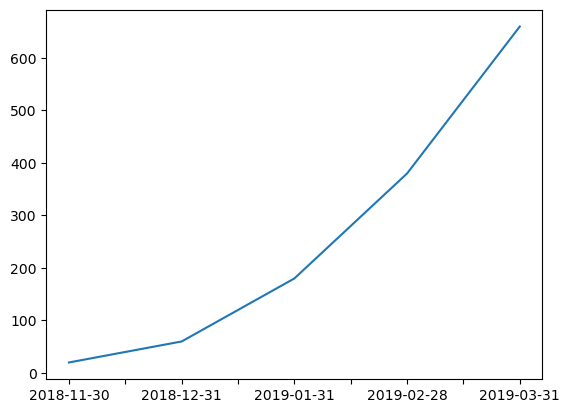

In [37]:
salary.income.plot()

Как отрисовать простой график зависимости зарплаты от даты Разные способы построения такого графика:

salary.plot()

salary.plot(kind='line')

plt.plot(salary.index, salary.income)

sns.lineplot(data=salary)

sns.lineplot(x=salary.index, y=salary.income)

salary['income'].plot()

Задача. Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

In [53]:
df = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\dataset_209770_6.txt', sep=' ')
df.head(2)

,x,y
0,795.882302,988.261678
1,797.007465,1013.069477


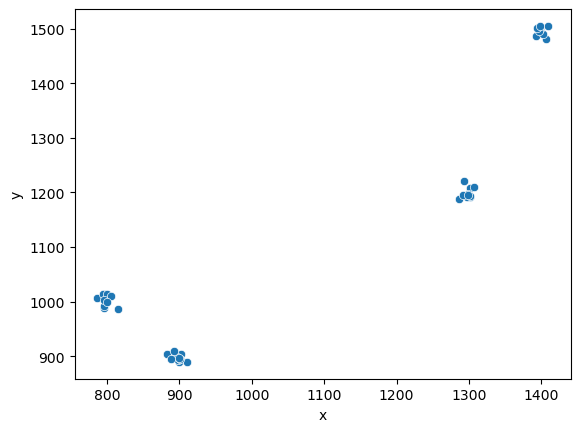

In [60]:
ax = sns.scatterplot(x='x', y='y', data=df)

In [122]:
df_genome = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\genome_matrix.csv', index_col=0)
df_genome.head(2)

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214


index_col=0  = добавлен к чтению датафрейма, чтобы в качестве индексов строк была 0 колонка

##### Тепловая карта

Тепловая карта — это тип диаграммы, в которой для представления значений данных используются разные оттенки цветов.

cmap="viridis" = параметр для данной цветовой схемы

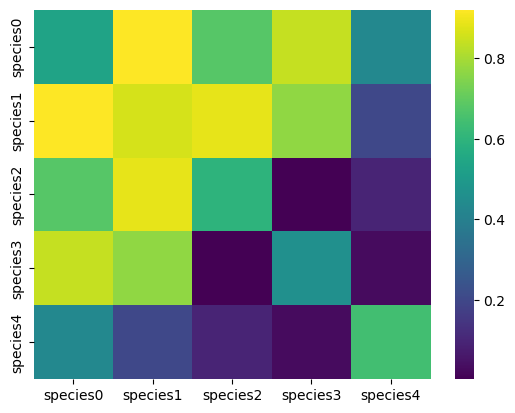

In [124]:
df_genome_map = sns.heatmap(df_genome, cmap="viridis")

какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [156]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)
df_dota.head(2)

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"


Чтобы посчитать число ролей - посчитаем число запятых + 1

In [158]:
df_hero = df_dota.roles.str.count(',')+1
df_hero.mean()

4.0

Чтобы сгруппировать по ролям, нужно столбец преобразовать (т.к. там сейчас список строк).

Для начала уберем все кавычки.

In [127]:
template = "["
df_dota['roles'] = df_dota['roles'].str.replace(template, '', regex=True)
template2 = "]"
df_dota['roles'] = df_dota['roles'].str.replace(template2, '', regex=True)
template3 = "'"
df_dota['roles'] = df_dota['roles'].str.replace(template3, '', regex=True)
df_dota

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"Carry, Escape, Nuker"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"Initiator, Durable, Disabler, Jungler"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"Support, Disabler, Nuker, Durable"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"Carry, Disabler, Jungler, Nuker, Initiator"
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"Support, Disabler, Nuker, Jungler"
...,...,...,...,...,...,...,...
112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"Carry, Escape, Disabler, Initiator"
113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"Support, Nuker, Disabler, Escape"
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"Carry, Nuker, Disabler, Durable, Escape, Initi..."
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"Support, Nuker, Disabler, Escape"


##### explode()

explode() - Эта функция используется для преобразования столбца списков или массивов в несколько строк, с одной строкой для каждого элемента в списке или массиве.

In [130]:
#перед тем как применить explode, нужно сделать списки. А еще появился какой то лишний пробел перед именем, реплэйсним его тоже
template4 = " "
df_dota['roles'] = df_dota['roles'].str.replace(template4, '', regex=True)
df_dota['roles'] = df_dota['roles'].apply(lambda x: x.split(',') if pd.notna(x) else x)    
df_dota = df_dota.explode('roles')
df_dota.head(2)

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Carry
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Escape


In [153]:
df_dota_roles = df_dota.groupby('roles', as_index=False)['id'].count()
df_dota_roles.sort_values(['id'], ascending=False)    # отсортируем по убыванию количества

,roles,id
1,Disabler,86
6,Nuker,84
0,Carry,64
4,Initiator,53
2,Durable,47
3,Escape,47
8,Support,43
7,Pusher,29
5,Jungler,15


<Axes: xlabel='roles', ylabel='id'>

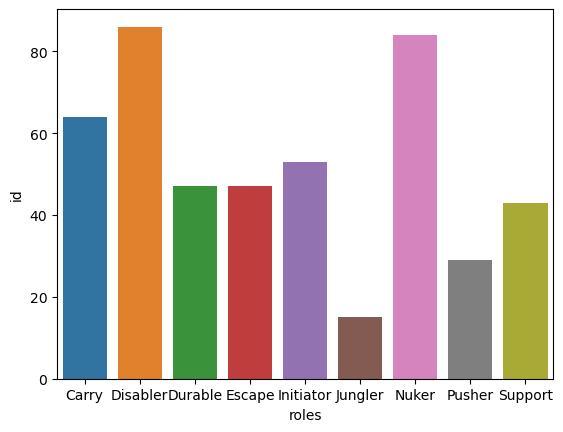

In [152]:
sns.barplot(data=df_dota_roles, x="roles", y="id")

Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

for column in df:

    # Draw distribution with that column

In [160]:
iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
iris.head(2)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


##### kdeplot  -  линейный график распределения

это метод визуализации распределения наблюдений в наборе данных, аналогичный гистограмме. KDE представляет данные, используя непрерывную кривую плотности вероятности в одном или нескольких измерениях.

<Axes: ylabel='Density'>

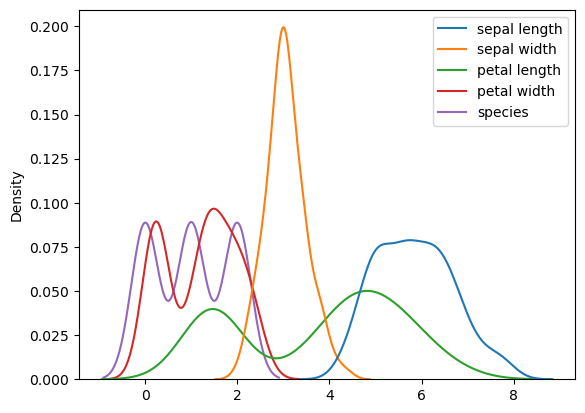

In [161]:
sns.kdeplot(data=iris)

Sepal width и sepal length имеют унимодальное распределение


Petal width и petal length имеют бимодальное распределение


Petal length имеет наибольший размах значений


Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

###### violinplot  -  скрипичный график
комбинация ящичной диаграммы и оценки плотности ядра.

Скрипичный график играет ту же роль, что ящик с усами. Он показывает распределение количественных данных по нескольким уровням одной (или нескольких) категориальных переменных, так что эти распределения можно сравнивать. В отличие от коробчатой ​​диаграммы, в которой все компоненты диаграммы соответствуют фактическим точкам данных, в скрипичной диаграмме используется оценка плотности ядра базового распределения.

<Axes: >

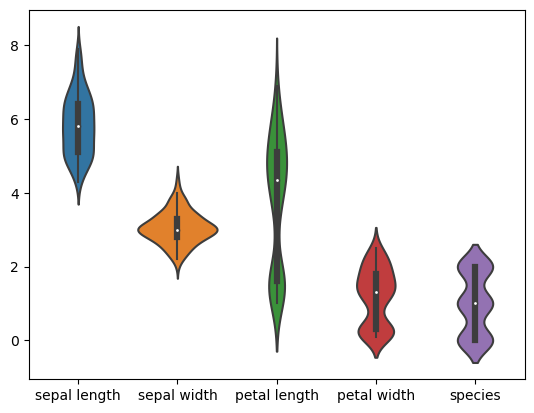

In [162]:
sns.violinplot(data=iris)

<Axes: >

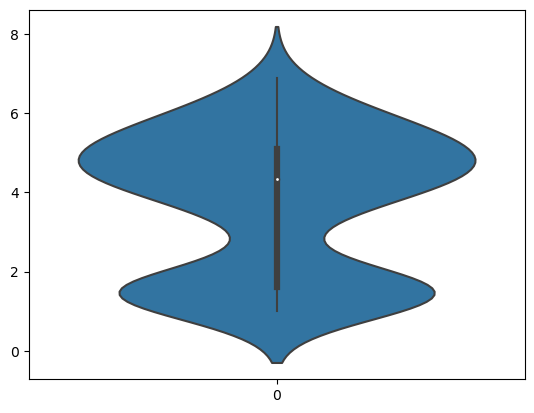

In [164]:
sns.violinplot(data=iris['petal length'])

##### pairplot

Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных.

Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра hue.

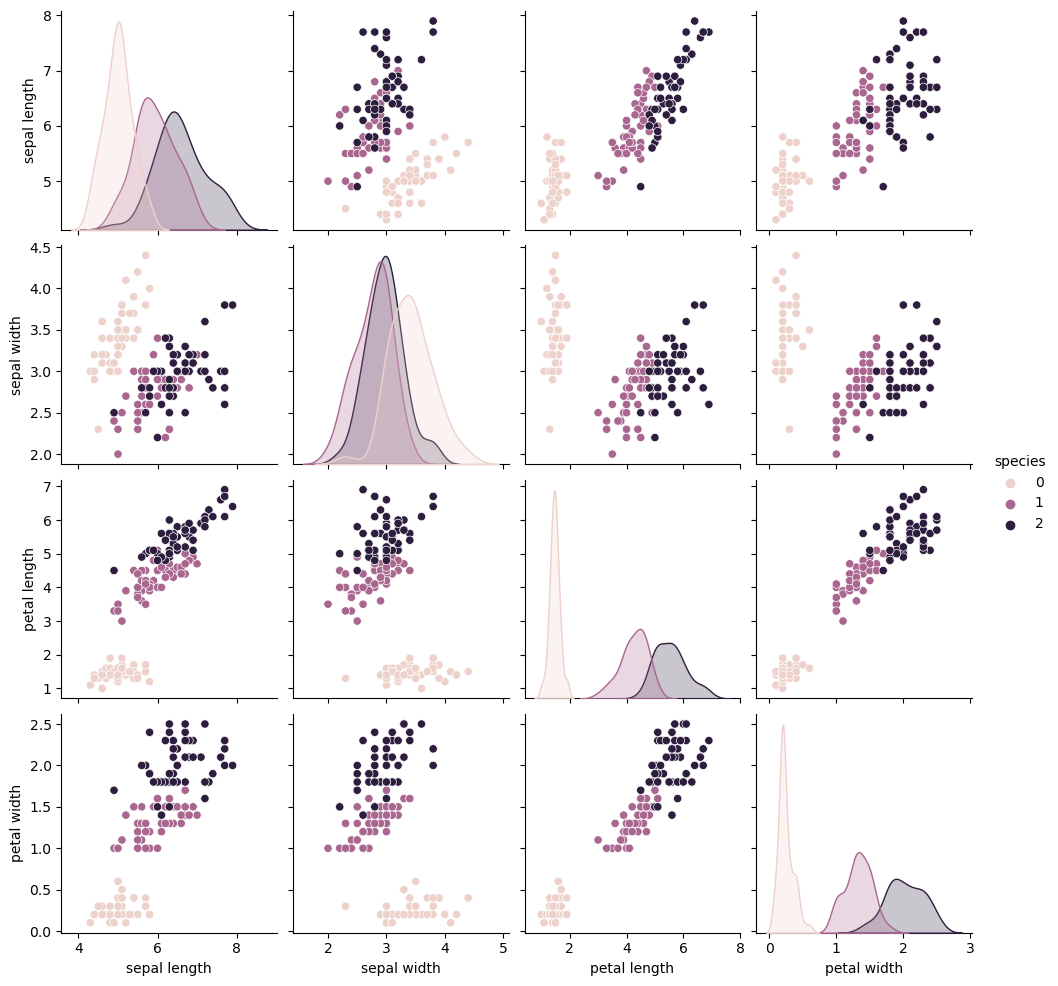

In [167]:
sns.pairplot(data=iris, hue="species")

petal width и petal length имеют наиболее сильную корреляцию